In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw08.ipynb")

# Homework 8: The Central Limit Theorem & Intro to Testing Hypotheses


**Recommended Readings**: 

* [The Central Limit Theorem](https://inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html)

* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)




## Due on Gradescope


## Collaboration Policy

Data science is a collaborative activity.  However a key step in learning and retention is **creating solutions on your own.**  

Please see the **Course Syllabus for the Collaboration Policy**.

On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a HW problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a HW solution that was your own when asked in office hours by an Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor.

We are here to help!  Visit OH Hours and/or post questions on Piazza!

If while completing this assignment you reference any websites other than those linked in this assignment or provided on Canvas please list those references here:

**External references**:  *list any websites you referenced

#### Grading
Grading is broken down into autograded answers and manually graded answers. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For manually graded answers you must show and explain all steps.  Graders will evaluate how well you answered the question and/or fulfilled the requirements of the question.


### Score breakdown



Question | Points | Grading Type
--- | --- | ---
Question 2 | 12 | manual
Question 3 | 16 | manual
Question 4abcdefgij | 18 | autograded
Question 4h | 4 | manual
|Total | 50

In [2]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from IPython.display import display, Latex, Markdown

plt.style.use('fivethirtyeight')
# Default plot configurations
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()
import warnings
warnings.simplefilter('ignore', FutureWarning)

%matplotlib inline


<!-- BEGIN QUESTION -->

## Question 2 :


A hardware store receives a shipment of 10,000 bolts that are supposed to be 12 cm long. 
The mean of this shipment of 10,000 bolts is indeed 12 cm, and the standard deviation is 0.2 cm.   

For the following questions, determine if you have enough information to answer.  If you do, then show all steps calculating the answer in the Markdown cell directly below.  If you don't, explain what additional information you would need.  If you use any theorems, cite the theorem and specify which assumptions are necessary for the theorem to hold.  


**Question 2a)**. What is the probability that a randomly chosen bolt is less than 10 cm long?


**Question 2b)**.  For quality control, the hardware store chooses 100 bolts at random to measure.  They will declare the shipment defective and return it to the manufacturer if the average length of 100 bolts is less than 11.97 cm or greater than 12.04 cm.    Find the probability that the shipment is found satisfactory (i.e. not defective).

 


### 2a
Given

    mean = 12cm
    sd = 0.2cm
    X = 10cm
    z-score forumula = (X - mean)/sd
    Z = (10-12)/0.2 = -10
This essentially means that the probability that a bolt is 10cm longs is so astronomically low since it is around 10 standard deviations away from the mean which is practically impossible. 

In [3]:
#2a calculations
import scipy.stats as stats

X = 10
mu = 12
sigma = 0.2
# Calculate the Z-score for X = 10 cm
Z = (X - mu) / sigma

# Find the probability
p_less_than_10cm = stats.norm.cdf(Z)

Z, p_less_than_10cm

(-10.0, 7.61985302416047e-24)

### 2b
Given
    
    mean of sample = 12cm
    sd of sample mean = sigma/sqrt(n) where n = 100
    sd of sample mean = 12/10 = 1.2

In [4]:
import scipy.stats as stats

mu = 12  # population mean
sigma = 0.2  # population standard deviation
n = 100  # sample size
x1 = 11.97  # lower bound of the sample mean
x2 = 12.04  # upper bound of the sample mean

# Calculate the standard deviation of the sample mean
sigma_xbar = sigma / (n ** 0.5)

# Calculate Z-scores
z1 = (x1 - mu) / sigma_xbar
z2 = (x2 - mu) / sigma_xbar

# Calculate the probabilities
p1 = stats.norm.cdf(z1)
p2 = stats.norm.cdf(z2)

# Probability that the sample mean is between x1 and x2
p_satisfactory = p2 - p1

p_satisfactory

0.9104426667829563

<!-- END QUESTION -->

To check your answer to part 2b, enter it into the cell below.  Note that this is a just a check to make sure you're on the right track.  To receive credit you must show all your steps in the Markdown cell above.   

In [7]:
q2b_check = p_satisfactory
q2b_check

0.9104426667829563

In [8]:
grader.check("q2b")

q2b results: All test cases passed!

## Question 3
*** 

The file `income_data.csv` contains Age and Income information from a fictitious city in the Midwest with 5000 residents.   Consider this data to be our population data.



<!-- BEGIN QUESTION -->

**QUESTION 3A**: Load the data into a pandas DataFrame called `dfIncome`, calculate the population mean of Income and then  make a **density histogram** of the Distribution of the Income data **with 15 bins**.   Include a title for your plot and label the x-axis (we have provided a label for the y-axis).
Note we have included code to mark where the population mean lies on the histogram.

Population income mean is 60613.8492


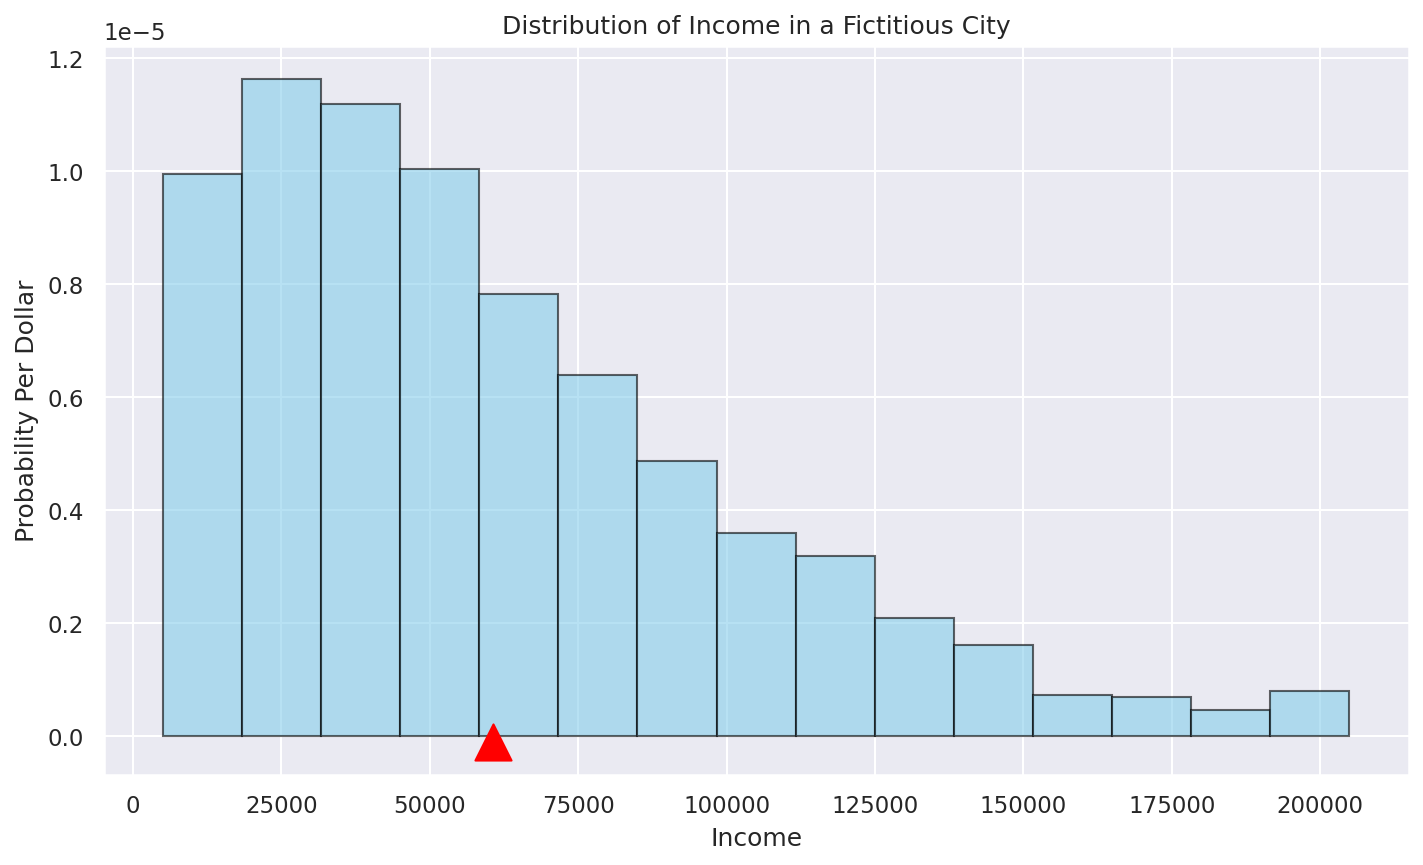

In [10]:
# Load the data
dfIncome = pd.read_csv("data/income_data.csv")

# Calculate the population mean of Income
mean_income = dfIncome['Income'].mean()

# Print the population income mean
print("Population income mean is", mean_income)

# Plot density histogram of the Distribution of the Income data with 15 bins
plt.figure(figsize=(10, 6))
plt.hist(dfIncome['Income'], bins=15, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.ylabel("Probability Per Dollar")  # Since this is a density histogram, the y-units are probability per unit x
plt.xlabel("Income")
plt.title("Distribution of Income in a Fictitious City")

# Add a triangle marker to indicate where the population mean is
plt.scatter(mean_income, -.0000001, marker='^', color='red', s=300)

plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**QUESTION 3B**: Describe the shape of the Income distribution (i.e. comment on modality and skew)

The income distribution depicted in the histogram is unimodal, represneted by its one prominent peak. The distribution shows a right-skew , as indicated by the longer tail extending to the right side of the histogram. This suggests that there are a number of individuals with incomes significantly higher than the mean, pulling the tail of the distribution outwards. The bulk of the data clusters to the left of the mean, showing that the majority of the population has an income around or below the mean, with fewer individuals earning much more.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**QUESTION 3C**: 

i).  Write a function to collect a random sample of size `sample_size` with replacement from `dfIncome`  and plot the **density histogram** of the empirical distribution of the income for your sample.  Use 15 bins for your histogram and set the x-axis range to be from (0,210000).   (Hint: use the dataframe method `.sample()`). Include a title and label for both axes.          
Then run the cells provided below to output 3 separate distributions for sample sizes of $10$, $100$ and $1000$. 


In [11]:
def income_sample(df, sample_size):
    # Collect a random sample with replacement
    sample = df['Income'].sample(n=sample_size, replace=True)
    
    # Plot the density histogram
    plt.figure(figsize=(10, 6))
    plt.hist(sample, bins=15, density=True, alpha=0.6, color='skyblue', edgecolor='black', range=(0, 210000))
    plt.title(f'Sample Distribution of Income (n={sample_size})')
    plt.xlabel('Income')
    plt.ylabel('Probability Density')
    plt.show()

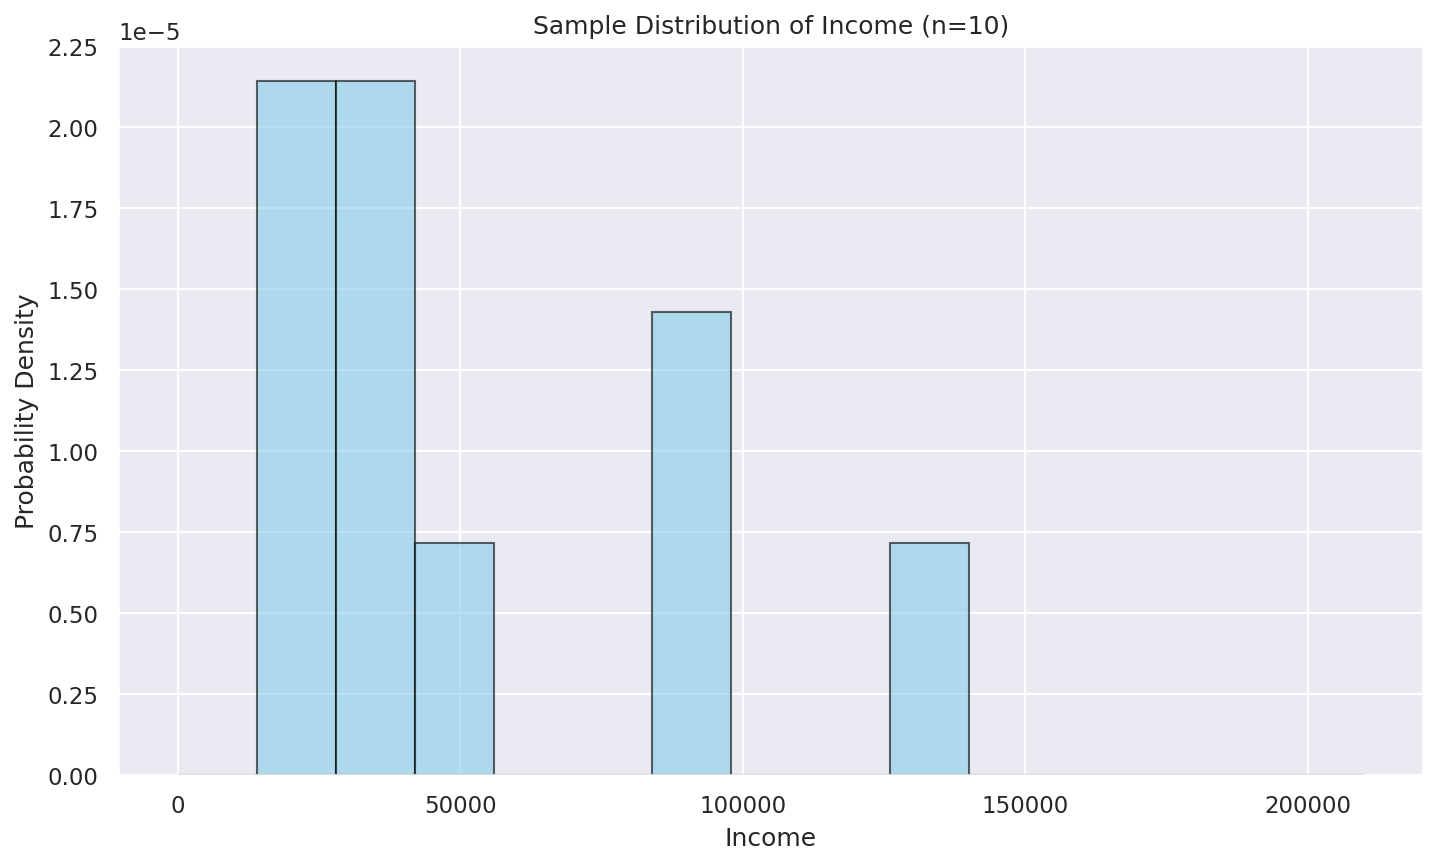

In [12]:
income_sample(dfIncome,10)

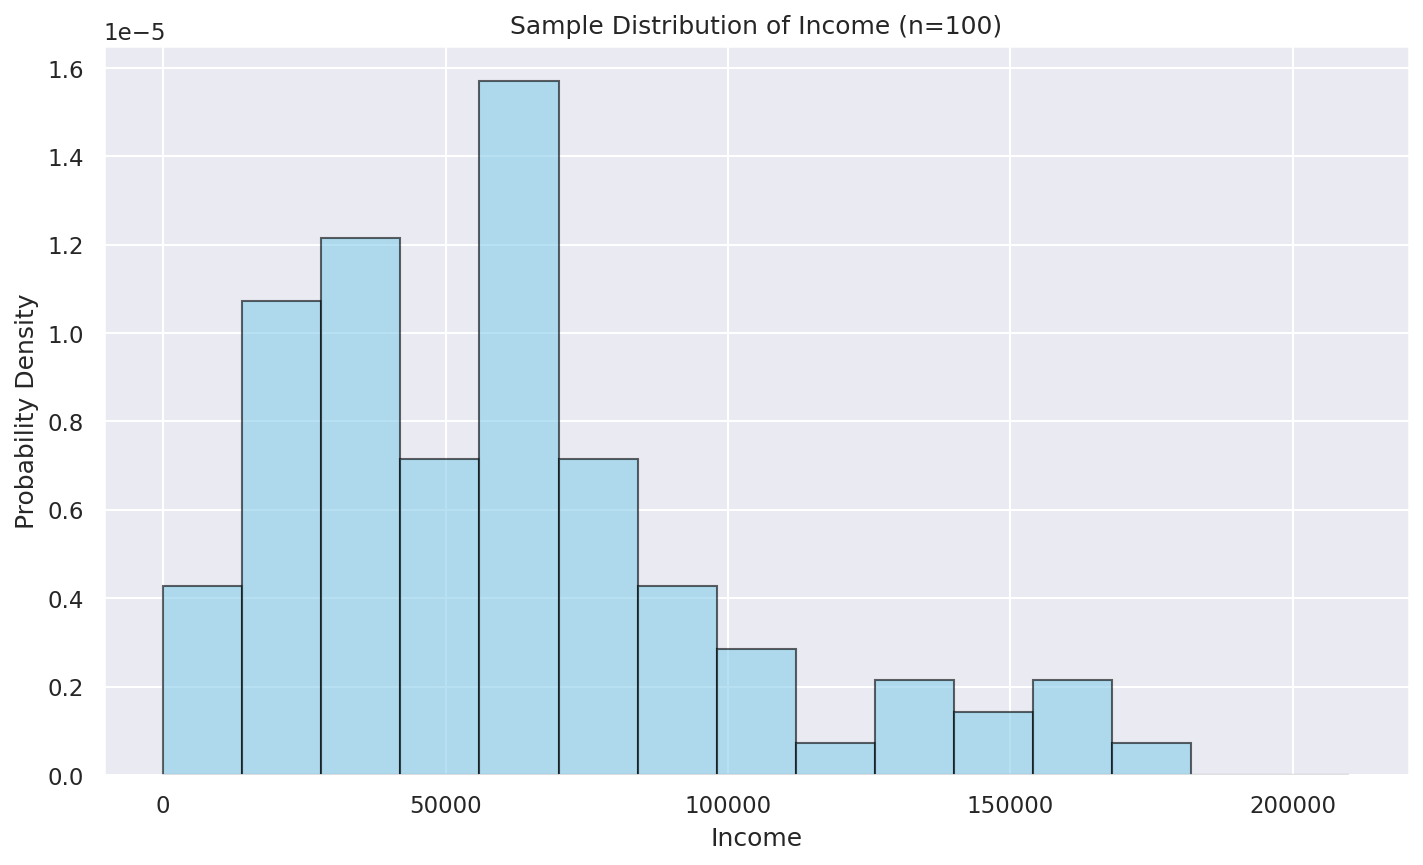

In [13]:
income_sample(dfIncome,100)

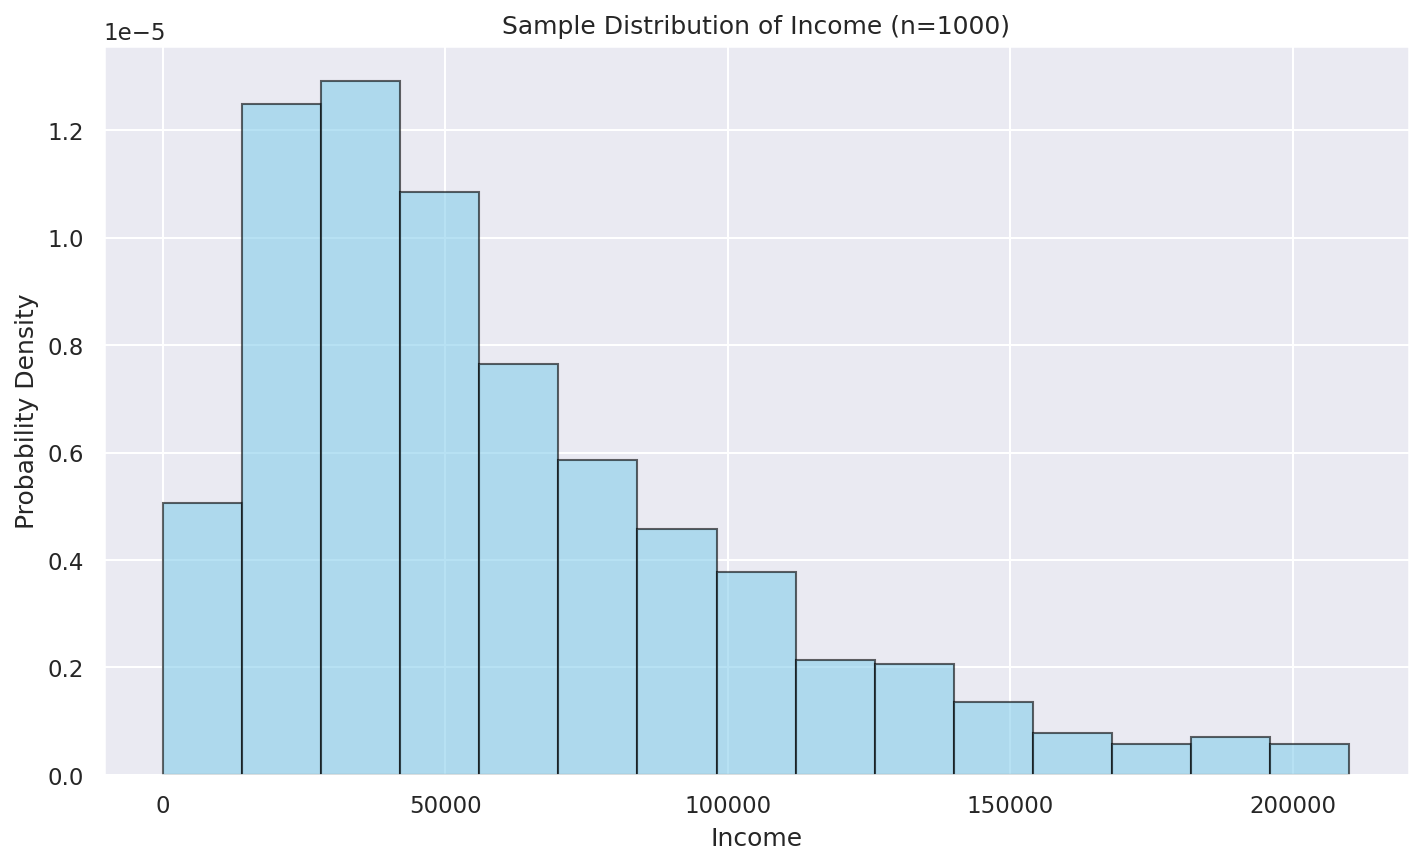

In [14]:
income_sample(dfIncome,1000)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Part 3cii).  What happens to the shape of the empirical sample distributions of income as you increase the sample size? 

As we increase the sample size, we begin to have a more uniform distribution rather than "splotches" of data. In the sample size of 10, we can see how there are many bins which have no data and as we increase the sample size, more and more bins begin to show. Furthermore, if we compare the 100 to the 1000 sample size, we can see a substantial change to the distribution. While they both are indicative of a right-skewed distribution, the 1000 sample size shows greater accuracy of the dataset as the mean is pulled towards the left. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**QUESTION 3D:**  


If we want to estimate the **mean** of the population we can draw a sample from the population and compute the sample mean.  As we learned in class, since samples can vary, the sample mean can vary and thus it is a random variable and has its own distribution.


i).  Complete the function `income_sample_mean` below to randomly sample `sample_size` rows from `dfIncome` with replacement and return the sample mean of income for that sample. 


ii).  Complete the function `income_sample_dist` below to simulate `num_simulations` of randomly sampling `sample_size` rows from `dfIncome` with replacement and calculate the sample mean of income for each sample.
Store the sample means in an np.array called `means`.  The function should output a **density** histogram of the empirical sample mean income distribution.    On the histogram, include two markers on the histogram: A red one for the population mean (that you calculated in part 3A) and a yellow one for the mean of the `num_simulations` sample mean estimates.
Include a title and labels for the x and y-axis.

Then run the cells provided below to output 3 separate distributions for `num_simulations`=1000 and `sample_size` = $10$, $100$ and $1000$



In [15]:
def income_sample_mean(df, sample_size):
    # Collect a random sample with replacement
    sample = df['Income'].sample(n=sample_size, replace=True)
    # Return the sample mean of income
    return sample.mean()

In [16]:
def income_sample_dist(df, sample_size, num_simulations):
    # Initialize an array to store the means
    means = np.empty(num_simulations)
    
    # Simulate num_simulations of sample means
    for i in range(num_simulations):
        means[i] = income_sample_mean(df, sample_size)
    
    # Plot the density histogram of the sample mean distribution
    plt.figure(figsize=(10, 6))
    plt.hist(means, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Sample Means (n={sample_size}, simulations={num_simulations})')
    plt.xlabel('Sample Mean Income')
    plt.ylabel('Probability Density')
    plt.xlim([20000, 120000])

    # Add markers for the population mean and the mean of the sample means
    plt.scatter(mean_income, -.0000001, marker='^', color='red', s=100, label='Population Mean')
    plt.scatter(means.mean(), -.0000001, marker='^', color='yellow', s=100, label='Mean of Sample Means')
    plt.legend()

    plt.show()

# Your code for part (ii) above

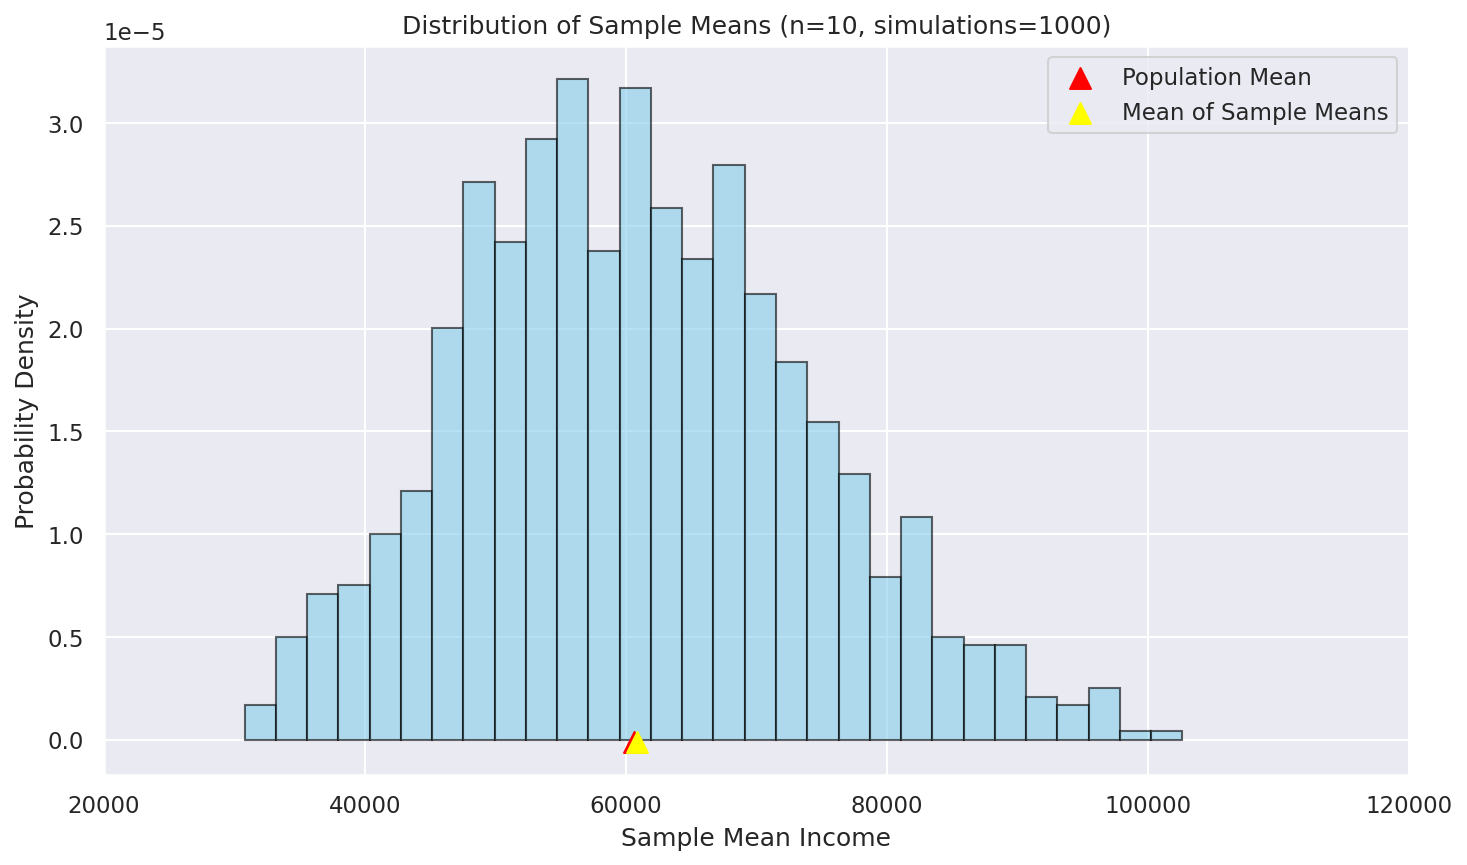

In [17]:
income_sample_dist(dfIncome, 10, 1000)

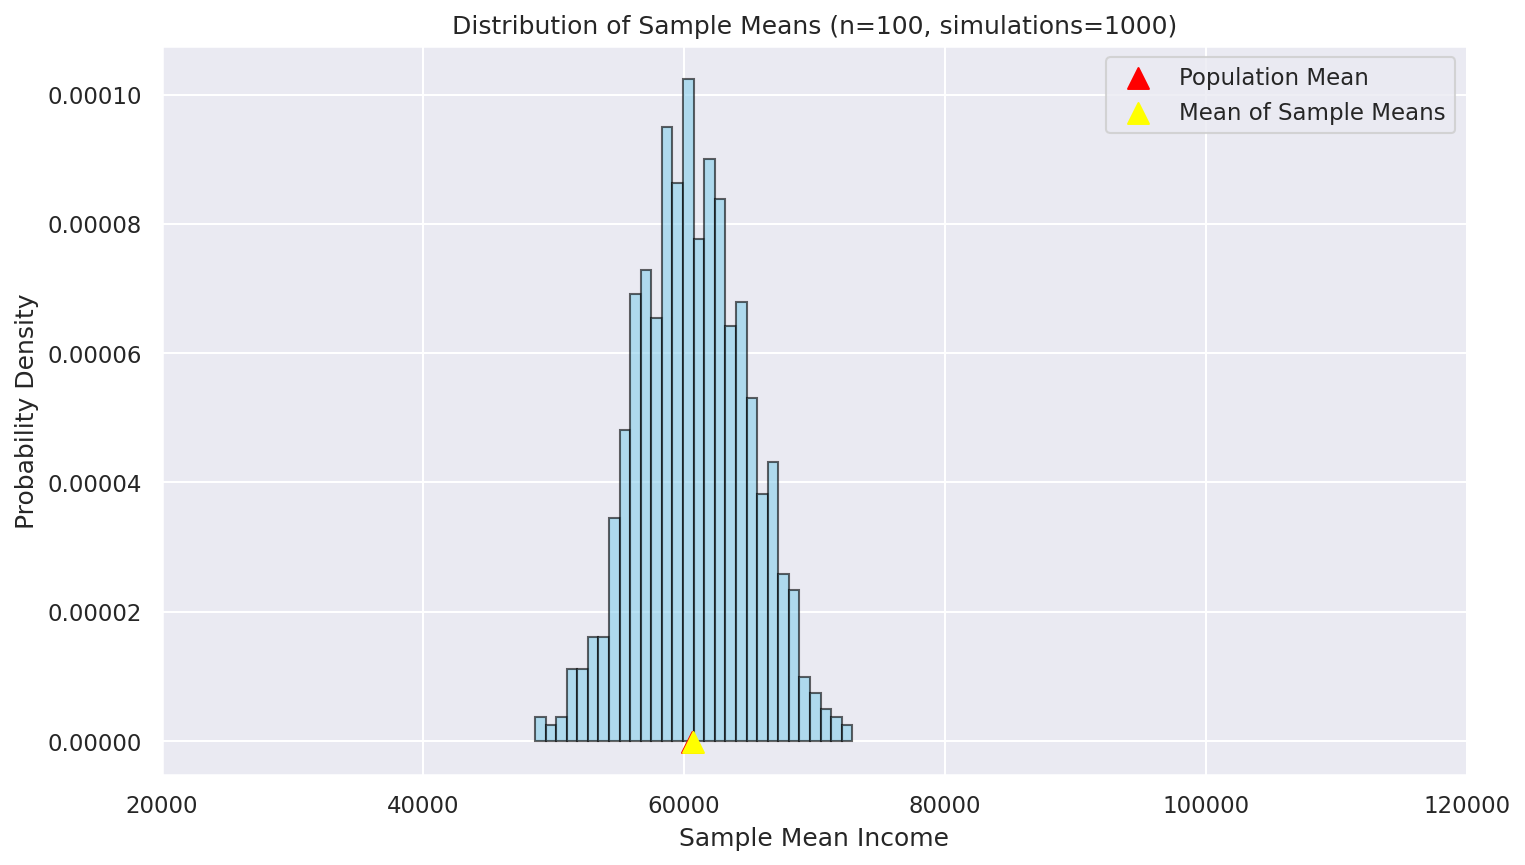

In [18]:
income_sample_dist(dfIncome, 100, 1000)

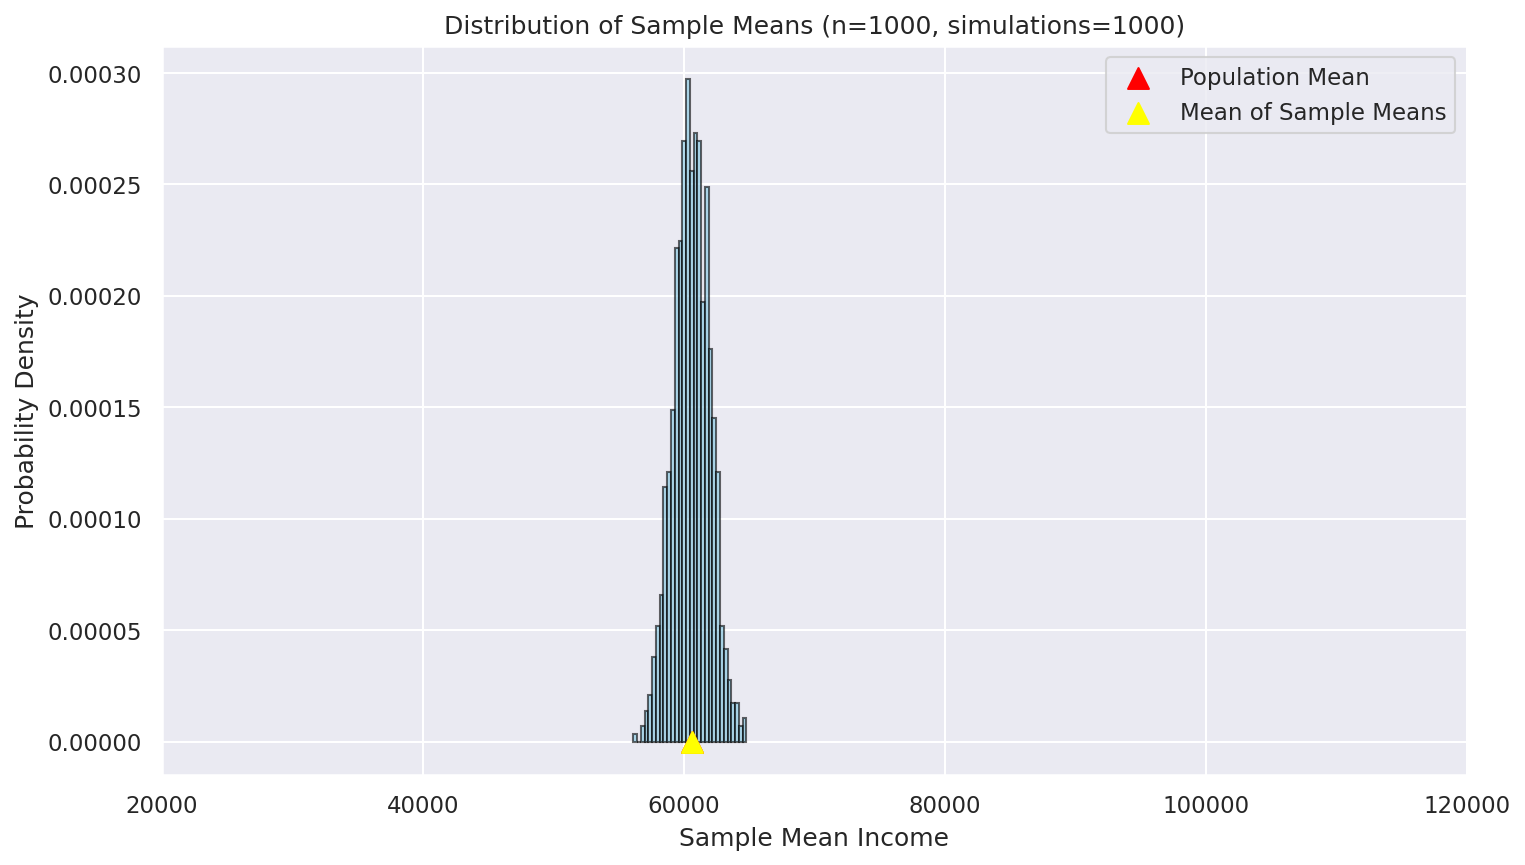

In [19]:
income_sample_dist(dfIncome, 1000, 1000)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**QUESTION 3E:** 

Describe the shapes of the empirical sample mean distributions (comment on their modality and skew compared to the modality and skew of the population distribution).
What happens to the mean and standard deviations of these distributions as you increase the sample size?
What is the name of the theorem that explains what you are observing?

The empirical sample mean distributions displayed in the histograms are all unimodal, meaning each distribution has a single prominent peak. As the sample size increases from 10 to 100 to 1000, the distributions become increasingly symmetric and less skewed, unlike the original population income distribution which was right-skewed. This is because the larger the sample size, the more the sampling distribution of the sample mean tends to the normal distribution, even if the underlying population distribution is not normal.

The mean of these distributions tends to stay around the same value, which should be close to the population mean, due to the Law of Large Numbers. The standard deviation of these distributions decreases as the sample size increases. This is because the standard error is inversely proportional to the square root of the sample size—larger samples tend to produce more precise estimates of the population mean.

The theorem that explains this phenomenon is the Central Limit Theorem. It states that the sampling distribution of the sample mean will approximate a normal distribution as the sample size becomes large, regardless of the shape of the population distribution, provided the samples are independent and identically distributed. The Central Limit Theorem also implies that this distribution will have a mean equal to the population mean and a standard deviation equal to the population standard deviation divided by the square root of the sample size.

<!-- END QUESTION -->

## QUESTION 4:  

The Therapeutic Touch (TT) is the idea that everyone can feel the Human Energy Field (HEF) around individuals.  Those who practice TT have described different people's HEFs as "warm as Jell-O" and "tactile as taffy." 

TT was a popular technique used throughout the 20th century that was toted as a great way to bring balance to a person's health. Certain practitioners claim they have the ability to feel the HEF and can massage it in order to promote health and relaxation in individuals.

### Emily Rosa

[Emily Rosa](https://en.wikipedia.org/wiki/Emily_Rosa) was a 4th grade student from Loveland, Colorado who was very familiar with the world of TT, thanks to her parents, who were both medical practitioners and skeptics of TT.

For her 4th grade science fair project, Emily decided to test whether or not TT practitioners could truly interact with a person's HEF. She later went on to publish her work in TT, becoming the youngest person to have a research paper published in a peer reviewed medical journal.

### Emily's Experiment

Emily's experiment was clean, simple, and effective. Due to her parents' occupations in the medical field, she had wide access to people who claimed to be TT practitioners. 

Emily took 21 TT practitioners and used them for her science experiment. She would take a TT practitioner and ask them to extend their hands through a screen (which they can't see through). Emily would be on the other side and would flip a fair coin. Depending on how the coin landed, she would put out either her left hand or her right hand. The TT practitioner would then have to answer which hand Emily put out. If a pracitioner could truly interact with a person's HEF, it would be expected that they answered correctly.

Overall, through 210 samples, the practitioner picked the correct hand 44% of the time. 

Emily's main goal here was to test whether or not the TT practitioners' guesses were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not the treatment has **any** effect, *not* whether or not the treatment actually worked.
We will now begin to formulate this experiment in terms of the terminology we learned in this course. 

**QUESTION 4A:**  Which of the following is Emily's null hypothesis? 

 - (a):  Practitioners are answering independently and better than if they were guessing at random (i.e. the probability of any practitioner correctly answering is greater than 50%)
 
 - (b): Practitioners are answering independently and randomly (i.e. the probability of any practitioner correctly answering is 50%).  
  
 - (c):  Practitioners are answering independently and worse than if they were guessing at random (i.e. the probability of any practitioner correctly answering is less than 50%)
 
Assign `null_hypothesis` to the correct letter (enter it as a lower case string, for example 'a').  Note that the test below just checks that you entered a valid letter, it doesn't check if the letter is correct (that will be done by a test when you submit the notebook).




*Note:* Check out [11.3](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#step-1-the-hypotheses) for a refresher on hypotheses.


In [21]:
null_hypothesis = 'b'

In [22]:
grader.check("q4a")

q4a results: All test cases passed!

**QUESTION 4B:** Given that we want to test whether or not the treatment has **any** effect, *not* whether or not the treatment actually worked, what is the alternative hypothesis?

Assign `alt_hypothesis` to the correct letter (enter it as a lower case string)

 - (a):  Practitioners are answering independently and better than if they were guessing at random (i.e. the probability of any practitioner correctly answering is greater than 50%)
 
  
 - (b):  Practitioners are answering independently and worse than if they were guessing at random (i.e. the probability of any practitioner correctly answering is less than 50%)
 
 - (c): Practitioners are answering independently and not randomly (i.e. the probability of any practitioner correctly answering is not 50%).  






In [23]:
alt_hypothesis = 'c'

In [24]:
grader.check("q4b")

q4b results: All test cases passed!

**QUESTION 4C:** 
Remember that the practitioner got the correct answer 44% (0.44) of the time. According to Emily's null hypothesis, on average, what proportion of times do we expect the practitioner to guess the correct hand? Make sure your answer is a number between 0 and 1. (Again, note that the test below does not check for the correct answer, it just checks that your answer is in the correct format). 


In [25]:
expected_proportion_correct = 0.5
expected_proportion_correct

0.5

In [26]:
grader.check("q4c")

q4c results: All test cases passed!

**QUESTION 4D:** 

The goal now is to see if our deviation from this expected proportion of correct answers is due to something other than chance. 


We usually use a statistic to help determine which model the evidence points towards. One of the test statistics below is appropriate for testing the null and alternative hypotheses you indicated above. Assign the variable `valid_test_stat` to the letter  (lower case  string) corresponding to the correct test statistic for this scenario. 



 - (a): 50 minus the actual percent correct
 - (b): the actual percent correct minus 50 
 - (c): 44 minus the actual percent correct
 - (d): the actual percent correct minus 44
 - (e): the sum of 50 and the actual percent correct
 - (f): the absolute value of the difference between 50 and the actual percent correct
 - (g): the absolute value of the difference between 44 and the actual percent correct


In [29]:
valid_test_stat = 'b'
valid_test_stat

'b'

In [30]:
grader.check("q4d")

q4d results: All test cases passed!

**QUESTION 4E:**  Define the function `statistic` which takes in an expected proportion and an actual proportion, and returns the value of the statistic chosen in Question 4d. Assume that the argument takes in proportions, but  **return your answer as a percentage**   (i.e. an answer of 0.70 should be output as $70$)

*Hint:* Remember we are asking for a **percentage**, not a proportion. 


In [57]:
def statistic(expected_prop, actual_prop):
    difference = (expected_prop - actual_prop) * 100
    return abs(difference)

In [58]:
grader.check("q4e")

q4e results: All test cases passed!

**QUESTION 4F:** Use your newly defined function from 4e to calculate the observed statistic from Emily's experiment. 

In [59]:
observed_statistic = statistic(0.50, 0.44)
observed_statistic

6.0

In [60]:
grader.check("q4f")

q4f results: All test cases passed!

**QUESTION 4G:**  Next we want to explore if this observed statistic is consistent with what we expect to see under Emily’s null hypothesis.  To do this, we will need to simulate test statistics under the null hypothesis.  

Let $X$ be the number of times the practioners are correct out of $210$ trials assuming the null hypothesis is true.  What distribution does $X$ have?

Assign the variable `X_dist` to the letter  (lower case  string) corresponding to the correct distribution for this scenario. 


 - (a): $X \sim Bin(210, 0.44)$
 - (b): $X \sim Bin(210, 0.5)$
 - (c): $X \sim Ber(.5)$
 - (d): $X \sim Ber(.44)$
 - (e): $X \sim Exp(.44)$
 - (f): $X \sim Exp(.55)$


In [61]:
X_dist = 'b'

In [62]:
grader.check("q4_g")

q4_g results: All test cases passed!

<!-- BEGIN QUESTION -->

**QUESTION 4H.** 

Create an array called `simulated_statistics` that contains 50,000 simulated values of the test statistic under the null hypothesis. Assume that the original sample consisted of 210 experiments. 

As usual, start by defining a function `one_simulated_statistic()` that simulates one value of the statistic. Your function should use `np.random.DISTRIBUTION` where `DISTRIBUTION` is the distribution you chose in part 4g.   Your function should also use your `statistic` function from part 4e.  


We have included the code that plots the distribution of the simulated values. The red dot represents the observed statistic you found in Question 4f.


In [67]:
def one_simulated_statistic():
    n = 210
    p = 0.5  # Probability of success under the null hypothesis
    # Simulate one trial of 210 experiments
    successes = np.random.binomial(n, p)
    # Calculate the statistic: difference between observed success rate and expected success rate under null hypothesis
    simulated_stat = statistic(0.5, successes / n)
    return simulated_stat

num_simulations = 50000

simulated_statistics = np.array([one_simulated_statistic() for _ in range(num_simulations)])


# Run the this cell a few times to see how the simulated statistic changes
one_simulated_statistic()

1.904761904761909

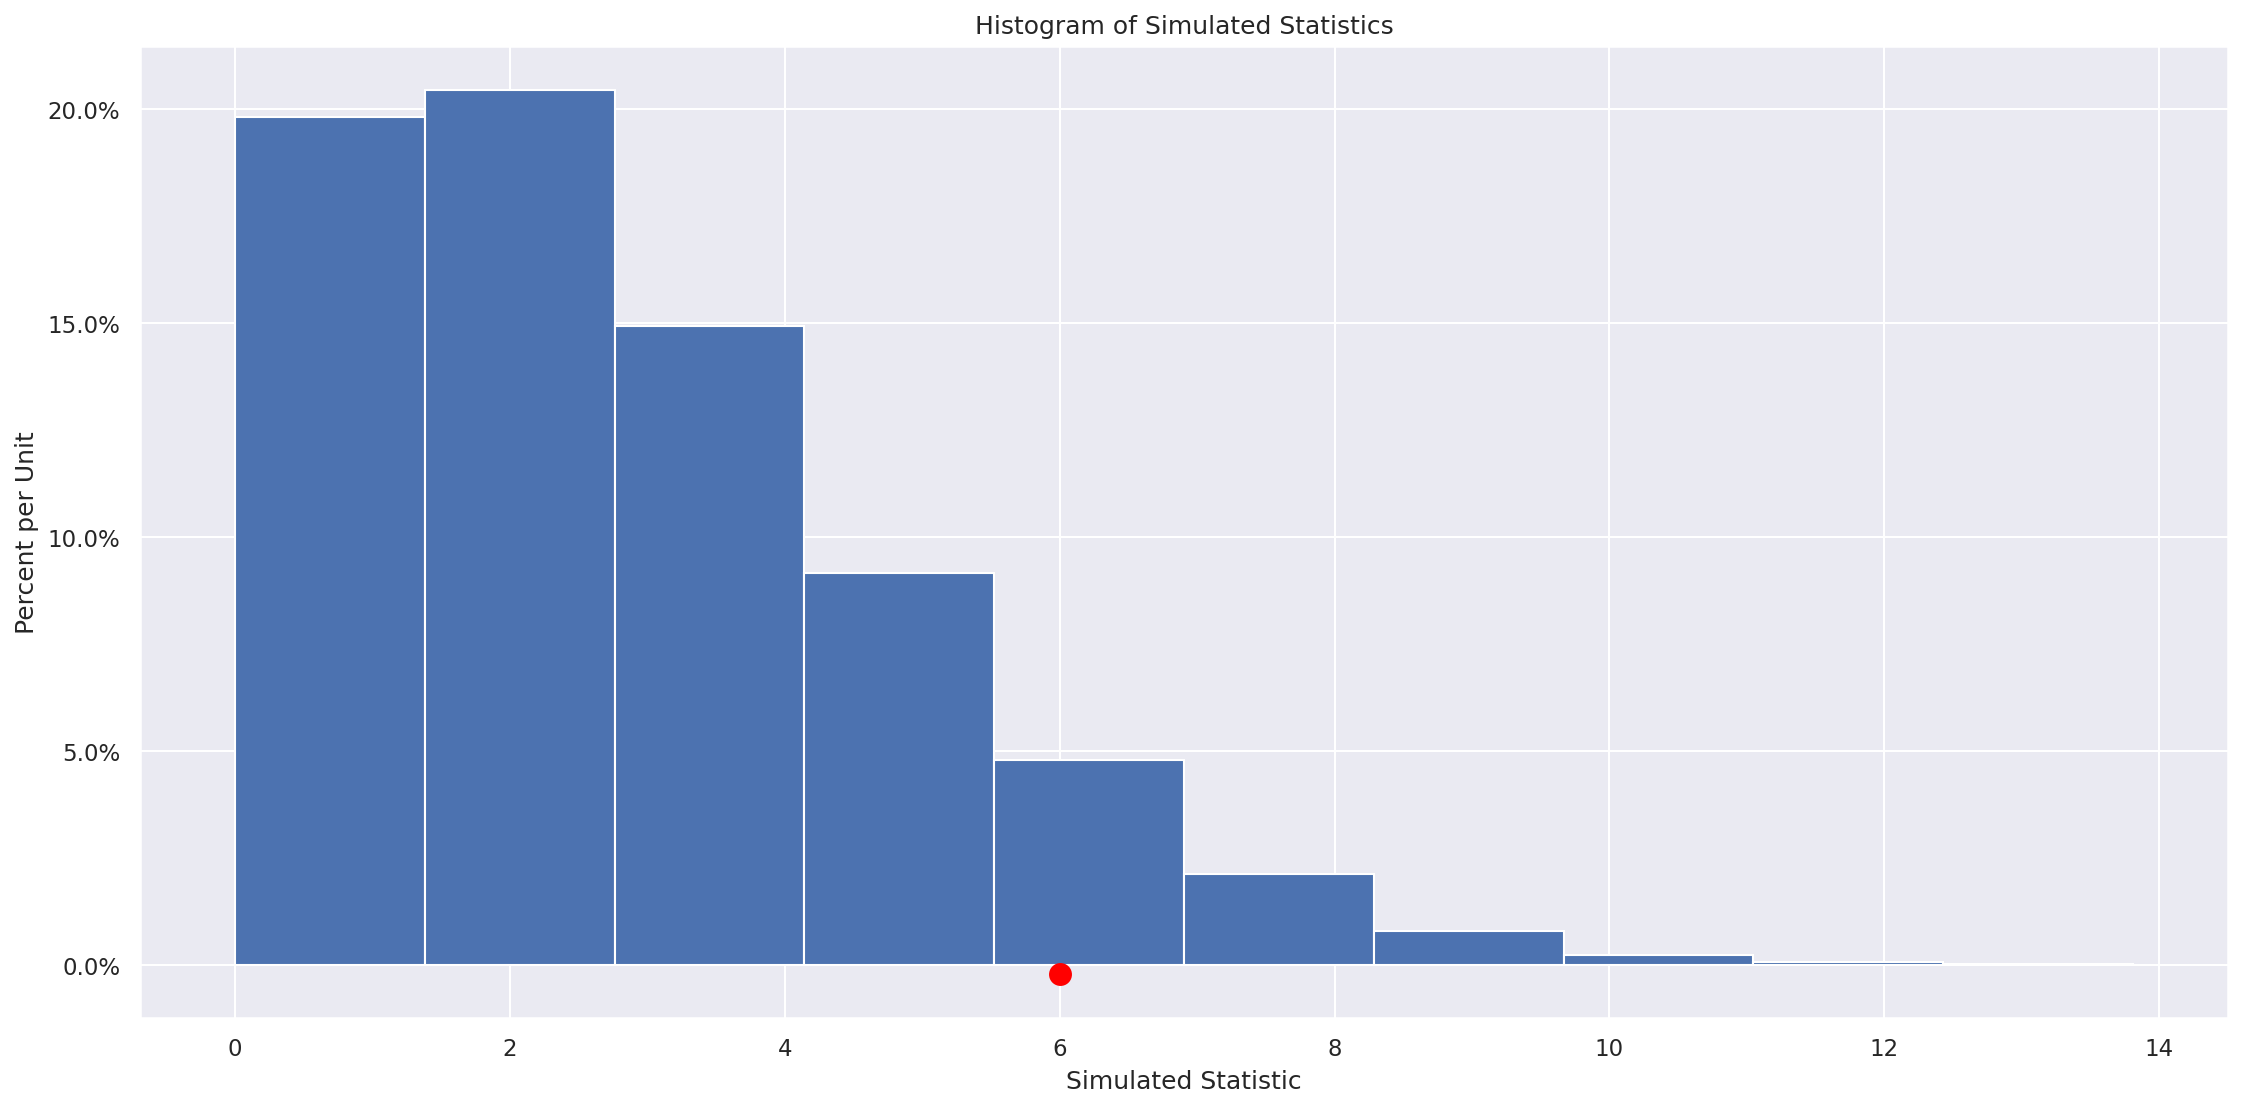

In [68]:
# Run this cell to produce a histogram of the simulated statistics
plt.hist(simulated_statistics, density = True, ec= "white")
plt.xlabel('Simulated Statistic')
plt.ylabel('Percent per Unit')
plt.title('Histogram of Simulated Statistics')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.scatter(observed_statistic, -0.002, color='red', s=100);
plt.show()

<!-- END QUESTION -->

**QUESTION 4I.** Using `simulated_statistics`, `observed_statistic`, and `num_simulations`, find the empirical p-value based on your simulation. 

In [69]:
p_value = np.mean(simulated_statistics >= observed_statistic)
p_value

0.0847

In [70]:
grader.check("q4_i")

q4_i results: All test cases passed!

**Question 4j** 


What is the conclusion of this hypothesis test using the 5% cutoff for the p-value?

 - (a). The data leads us to reject Emily's null hypothesis that the practitioners were just guessing.  This indicates that something more than just random chance is at play. 

 - (b). Given the data, we fail to reject Emily's null hypothesis that the practitioners are answering independently and randomly (i.e. we fail to reject that the probability of any practitioner correctly answering is 50%).  This doesn't prove that her hypothesis is correct, it just says we didn't find strong enough evidence to reject it.

 - (c) We accept Emily's null hypothesis that the probability of any practitioner correctly answering is 50%.  This proves that she was correct.




In [71]:
conclusion = 'b'

In [72]:
grader.check("q4_j")

q4_j results: All test cases passed!

Therapeutic touch fell out of use after this experiment, which was eventually accepted into one of the premier medical journals. TT practitioners hit back and accused Emily and her family of tampering with the results, while some claimed that Emily's bad spiritual mood towards therapeutic touch made it difficult to read her HEF. Whatever it may be, Emily's experiment is a classic example about how anyone, with the right resources, can test anything they want!


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 8!

If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: *list collaborators here*

### Submission Instructions

Before proceeding any further, **save this notebook.**

After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 

* **Homework 8 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the HW8 Autograded assignment in Gradescope.

* **Homework 8 Manually Graded**: Submit your hw08.PDF to the HW8 Manually Graded assignment in Gradescope.  **YOU MUST SELECT THE PAGES CORRESPONDING TO EACH QUESTION WHEN YOU UPLOAD TO GRADESCOPE.  IF NOT, YOU WILL LOSE POINTS**   Also, **check** that all of your plots **and** all lines of your code are showing up in your PDF before submitting.  If not, you will not receive credit for your plots/code.  


**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

AFTER running the cell below, click on <a href='hw08.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [73]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q2b results: All test cases passed!

    q4a results: All test cases passed!

    q4b results: All test cases passed!

    q4c results: All test cases passed!

    q4d results: All test cases passed!

    q4e results: All test cases passed!

    q4f results: All test cases passed!

    q4_g results: All test cases passed!

    q4_i results: All test cases passed!

    q4_j results: All test cases passed!
